### <font color='red'> Project Part 2: Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

## Objective

-  To predict whether a specific topic in twitter creates a buzz (Binary Classification problem).
    - Sample the dataset using randomization and stratification.
    - Run ensemble techniques like Voting Classifier, Bagging, Boosting, AdaBoost and Gradient Boosting on the scaled dataset with base classifiers with hypertuned parameters identified from Project 2.
    - Apply PCA on the classification dataset.
    - Fit different classification algorithms on the PCA applied data.
        - Select hyperparameters for each classification algorithm using Grid Search CV.
    - Choose evaluation metric and select the best model based on train and test scores.
    - Compare the accuracies of classifiers applied on PCA applied dataset with classifiers applied on the scaled version of the dataset
    - Run a deep learning classifier model on the PCA applied dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
columns =['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Annotation']

In [3]:
df_class = pd.read_csv('Twitter-Absolute-Sigma-500.data',header=None,names=columns,index_col=False)

In [4]:
X = df_class.iloc[:,:-1]
y = df_class['Annotation']

## Evaluation Strategy

**ROC_AUC_score** - ROC curve plots true positive rate versus false positive rate for all classification thresholds ranging from 0 to 1. Imbalanced dataset doesn't change the way in which the ROC curve is generated. To quantify the performance of the classifier, area under the  ROC curve is computed. AUC metric computes the probability that a classifier will rank randomly chosen positive observation higher than randomly chosen negative observation and thus serves as a good evaluation metric for imbalanced dataset.

In [5]:
from sklearn.metrics import roc_auc_score

#### _Data Sampling_

_Taking 10% of the data from entire dataset using randomization and stratification techniques._

In [6]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1, random_state = 10)

In [7]:
sample_target.value_counts()

0.0    11350
1.0     2721
Name: Annotation, dtype: int64

#### _Train-Test Split_

_Splitting the sample dataset into train set (80%) and test set (20%)_

In [8]:
X_train_S, X_test_S, y_train, y_test = train_test_split(sample_data, sample_target, test_size=0.2, random_state = 10)

#### _Scaling_

_Applying MinMaxScaler() on train and test sets to scale the column values between 0 and 1. MinMaxScaler() reduces skewness but doesn't remove it. Since the column values are in the range of 0 to 1, the results will be consistent._

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_S)
X_test = scaler.transform(X_test_S)

## Visualization Plot for Train and Test data

In [10]:
def grid_train_test_plot(df,col,train,test,title,xlabel,ylabel,width,height,flag):
    fig = plt.figure(figsize=(width,height))
    x=len(df[col])
    x_label=df[col].unique()
    ax = fig.add_subplot(111,facecolor='white')
    ax.plot(df[col], df[train], c = 'g', linewidth=2, alpha=0.7,label='Train ROC score')
    ax.plot(df[col], df[test], c = 'b',linewidth=2, alpha=0.7,label='Test ROC score')
    ax.scatter(df[col], df[train], c = 'g', alpha=0.7,label='Train ROC score')
    ax.scatter(df[col], df[test], c = 'b',alpha=0.7,label='Test ROC score')
    if(flag=='show'):
        for i,j in zip(df[col],round(df[train],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
        for i,j in zip(df[col],round(df[test],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
    ax.legend()
    plt.grid(zorder=0)
    ax.set_title(title,fontsize=20,weight='bold')
    ax.set_xlabel(xlabel,fontsize=10,weight='bold')
    ax.set_ylabel(ylabel,fontsize=10,weight='bold')
    handles, labels = ax.get_legend_handles_labels()
    plt.show()

## Project 2 - Report and Results

_The table below shows the various Classifiers run on the raw dataset as part of Project2. The particular table will be later used for AUC Score metric comparison with same models run on PCA applied data._

In [11]:
old_table=pd.DataFrame({'Model Name':['K Neighbors Classifier','Logistic Regression','Linear Support Vector Machine Classifier','Linear Kernelized Support Vector Machine Classifier','RBF Kernelized Support Vector Machine Classifier','Poly Kernelized Support Vector Machine Classifier','Decision Tree Classifier'],'Model Parameters':["n_neighbors: 10","C: 10 , penalty: l1","C: 1, dual: False, loss: squared_hinge, penalty: l1","C: 100","C: 0.1, gamma: 0.01","C: 10, degree: 2, gamma: 0.01","max_depth: 5, max_features: 7"],'Train Accuracy':[0.970149,0.969172,0.967395,0.969083,0.809879,0.884684,0.970593],'Test Accuracy':[0.961989,0.966607,0.966607,0.966963,0.80746,0.879218,0.960924],'Train AUC Score':[0.939768,0.941443,0.934555,0.942966,0.506912,0.702149,0.948813],'Test AUC Score':[0.924188,0.936672,0.933925,0.938952,0.508167,0.69147,0.931078]})
print('\033[1m' + 'PREVIOUS PROJECT CLASSIFICATION MODEL BEST PARAMETER RUN RESULTS' + '\033[0m')
old_table

PREVIOUS PROJECT CLASSIFICATION MODEL BEST PARAMETER RUN RESULTS


,Model Name,Model Parameters,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score
0,K Neighbors Classifier,n_neighbors: 10,0.970149,0.961989,0.939768,0.924188
1,Logistic Regression,"C: 10 , penalty: l1",0.969172,0.966607,0.941443,0.936672
2,Linear Support Vector Machine Classifier,"C: 1, dual: False, loss: squared_hinge, penalt...",0.967395,0.966607,0.934555,0.933925
3,Linear Kernelized Support Vector Machine Class...,C: 100,0.969083,0.966963,0.942966,0.938952
4,RBF Kernelized Support Vector Machine Classifier,"C: 0.1, gamma: 0.01",0.809879,0.807460,0.506912,0.508167
5,Poly Kernelized Support Vector Machine Classifier,"C: 10, degree: 2, gamma: 0.01",0.884684,0.879218,0.702149,0.691470
6,Decision Tree Classifier,"max_depth: 5, max_features: 7",0.970593,0.960924,0.948813,0.931078


#### All the models used within the ensemble methods are run with the hypertuned parameters identified in Project2

## Voting Classifier Method - Hard

_An ensemble method where a collection of several models work together to improve model performance like increasing accuracy and  impoving model fit._
_Hard voting makes the final prediction by a simple taking majority of votes to classify data thereby improving accuracy._
_Used KNN, Logistic, Decision Tree and LinearSVC as internal algorithms for the ensemble models_

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
## Base Models for all Ensemble Methods
log_clf = LogisticRegression(C=10,penalty='l1',random_state=10)
log_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(max_depth=5,max_features=7,random_state=10)
dt_clf.fit(X_train, y_train)
svm_clf = LinearSVC(C = 1, dual=False,loss='squared_hinge',penalty='l1',random_state=10)
svm_clf.fit(X_train, y_train)
knn_clf= KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

_Two hard voting classifier models are trained_

In [13]:
## Model 1 - Logistic, Decision tree, KNN
voting_clf_mod_1 = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='hard')
voting_clf_mod_1.fit(X_train, y_train)
## Model 2 - Logistic, Decisiion tree, LinearSVC
voting_clf_mod_2 = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)], voting='hard')
voting_clf_mod_2.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', DecisionTr... max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=10, tol=0.0001,
     verbose=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [14]:
from sklearn.metrics import accuracy_score
print('\033[1m' + 'MODEL 1 - ACCURACY' + '\033[0m')
for clf in (log_clf, dt_clf, knn_clf, voting_clf_mod_1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ , ': {:.2f}'.format(accuracy_score(y_test, y_pred)))

MODEL 1 - ACCURACY
LogisticRegression : 0.97
DecisionTreeClassifier : 0.96
KNeighborsClassifier : 0.96
VotingClassifier : 0.96


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
from sklearn.metrics import roc_auc_score
print('\033[1m' + 'MODEL 1 - ROC AUC SCORE' + '\033[0m')
for clf in (log_clf, dt_clf, knn_clf, voting_clf_mod_1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ , ': {:.2f}'.format(roc_auc_score(y_test, y_pred)))

MODEL 1 - ROC AUC SCORE
LogisticRegression : 0.94
DecisionTreeClassifier : 0.93
KNeighborsClassifier : 0.92
VotingClassifier : 0.93


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
from sklearn.metrics import accuracy_score
print('\033[1m' + 'MODEL 2 - ACCURACY' + '\033[0m')
for clf in (log_clf, dt_clf, svm_clf, voting_clf_mod_2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ , ': {:.2f}'.format(accuracy_score(y_test, y_pred)))

MODEL 2 - ACCURACY
LogisticRegression : 0.97
DecisionTreeClassifier : 0.96
LinearSVC : 0.97
VotingClassifier : 0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
from sklearn.metrics import roc_auc_score
print('\033[1m' + 'MODEL 2 - ROC AUC SCORE' + '\033[0m')
for clf in (log_clf, dt_clf, svm_clf, voting_clf_mod_2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ , ': {:.2f}'.format(roc_auc_score(y_test, y_pred)))

MODEL 2 - ROC AUC SCORE
LogisticRegression : 0.94
DecisionTreeClassifier : 0.93
LinearSVC : 0.93
VotingClassifier : 0.93


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Voting Classifier Method - Soft

_An ensemble method where a collection of several models work together to improve model performance like increasing accuracy and  impoving model fit._
_Soft Voting can only be done when all your classifiers can calculate probabilities for the outcomes. Soft voting arrives at the best result by averaging out the probabilities calculated by individual algorithms._
_Used KNN, Logistic, Decision Tree and LinearSVC as internal algorithms for the ensemble models_

In [18]:
## Soft Voting Classifier Model 1
voting_clf_sft_1 = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='soft')
voting_clf_sft_1.fit(X_train, y_train)
## Soft Voting Classifier Model 2
voting_clf_sft_2 = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svm', svm_clf)], voting='soft')
voting_clf_sft_2.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', DecisionTr... max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=10, tol=0.0001,
     verbose=0))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [19]:
from sklearn.metrics import accuracy_score
print('\033[1m' + 'MODEL 1 - ACCURACY' + '\033[0m')
for clf in (log_clf, dt_clf, knn_clf, voting_clf_mod_1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ , ': {:.2f}'.format(accuracy_score(y_test, y_pred)))

MODEL 1 - ACCURACY
LogisticRegression : 0.97
DecisionTreeClassifier : 0.96
KNeighborsClassifier : 0.96
VotingClassifier : 0.96


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
from sklearn.metrics import roc_auc_score
print('\033[1m' + 'MODEL 1 - ROC AUC SCORE' + '\033[0m')
for clf in (log_clf, dt_clf, knn_clf, voting_clf_mod_1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ , ': {:.2f}'.format(roc_auc_score(y_test, y_pred)))

MODEL 1 - ROC AUC SCORE
LogisticRegression : 0.94
DecisionTreeClassifier : 0.93
KNeighborsClassifier : 0.92
VotingClassifier : 0.93


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
from sklearn.metrics import accuracy_score
print('\033[1m' + 'MODEL 2 - ACCURACY' + '\033[0m')
for clf in (log_clf, dt_clf, svm_clf, voting_clf_mod_2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ , ': {:.2f}'.format(accuracy_score(y_test, y_pred)))

MODEL 2 - ACCURACY
LogisticRegression : 0.97
DecisionTreeClassifier : 0.96
LinearSVC : 0.97
VotingClassifier : 0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
from sklearn.metrics import roc_auc_score
print('\033[1m' + 'MODEL 2 - ROC AUC SCORE' + '\033[0m')
for clf in (log_clf, dt_clf, svm_clf, voting_clf_mod_2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ , ': {:.2f}'.format(roc_auc_score(y_test, y_pred)))

MODEL 2 - ROC AUC SCORE
LogisticRegression : 0.94
DecisionTreeClassifier : 0.93
LinearSVC : 0.93
VotingClassifier : 0.93


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Bagging Classifier - Decision Tree Classifier

_Bagging runs a single model over various random subsets of the dataset.Nothing but random sampling with replacement. Here a decision tree classifier is the model considered for Bagging_

In [23]:
from sklearn.ensemble import BaggingClassifier
dt_bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10)
dt_bag_clf.fit(X_train, y_train)
y_pred = dt_bag_clf.predict(X_test)

In [24]:
print('Decision Tree - Accuracy Train score: {:.2f}'.format(dt_bag_clf.score(X_train, y_train)))
print('Decision Tree - Accuracy Test score: {:.2f}'.format(dt_bag_clf.score(X_test, y_test)))

Decision Tree - Accuracy Train score: 0.97
Decision Tree - Accuracy Test score: 0.96


In [25]:
dt_auc_train = roc_auc_score(y_train,dt_bag_clf.predict(X_train))
dt_auc_test = roc_auc_score(y_test,dt_bag_clf.predict(X_test))

In [26]:
print('Decision Tree - Train ROC AUC score: {:.2f}'.format(dt_auc_train))
print('Decision Tree - Test score: {:.2f}'.format(dt_auc_test))

Decision Tree - Train ROC AUC score: 0.94
Decision Tree - Test score: 0.94


## Bagging Classifier - Logistic Regression Classifier

_Logistic regression classifier is taken as internal model for performing Bagging_

In [27]:
lr_bag_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10)
lr_bag_clf.fit(X_train, y_train)
y_pred = lr_bag_clf.predict(X_test)

In [28]:
print('Logistic Regression Classifier - Accuracy Train score: {:.2f}'.format(lr_bag_clf.score(X_train, y_train)))
print('Logistic Regression Classifier - Accuracy Test score: {:.2f}'.format(lr_bag_clf.score(X_test, y_test)))

Logistic Regression Classifier - Accuracy Train score: 0.92
Logistic Regression Classifier - Accuracy Test score: 0.92


In [29]:
lr_auc_train = roc_auc_score(y_train,lr_bag_clf.predict(X_train))
lr_auc_test = roc_auc_score(y_test,lr_bag_clf.predict(X_test))

In [30]:
print('Logistic Regression - Train ROC AUC score: {:.2f}'.format(dt_auc_train))
print('Logistic Regression - Test ROC AUC  score: {:.2f}'.format(dt_auc_test))

Logistic Regression - Train ROC AUC score: 0.94
Logistic Regression - Test ROC AUC  score: 0.94


## Pasting Classifier - Decision Tree Classifier

_Bagging without replacement is called Pasting_

In [31]:
from sklearn.ensemble import BaggingClassifier
dt_past_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=10)
dt_past_clf.fit(X_train, y_train)
y_pred = dt_past_clf.predict(X_test)

In [32]:
print('Decision Tree - Accuracy Train score: {:.2f}'.format(dt_past_clf.score(X_train, y_train)))
print('Decision Tree - Accuracy Test score: {:.2f}'.format(dt_past_clf.score(X_test, y_test)))

Decision Tree - Accuracy Train score: 0.97
Decision Tree - Accuracy Test score: 0.96


In [33]:
dt_auc_train = roc_auc_score(y_train,dt_past_clf.predict(X_train))
dt_auc_test = roc_auc_score(y_test,dt_past_clf.predict(X_test))

In [34]:
print('Decision Tree - Train ROC AUC score: {:.2f}'.format(dt_auc_train))
print('Decision Tree - Test score: {:.2f}'.format(dt_auc_test))

Decision Tree - Train ROC AUC score: 0.94
Decision Tree - Test score: 0.94


## Pasting Classifier - Logistic Regression Classifier

In [35]:
lr_past_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=10)
lr_past_clf.fit(X_train, y_train)
y_pred = lr_past_clf.predict(X_test)

In [36]:
print('Logistic Regression Classifier - Accuracy Train score: {:.2f}'.format(lr_past_clf.score(X_train, y_train)))
print('Logistic Regression Classifier - Accuracy Test score: {:.2f}'.format(lr_past_clf.score(X_test, y_test)))

Logistic Regression Classifier - Accuracy Train score: 0.92
Logistic Regression Classifier - Accuracy Test score: 0.92


In [37]:
lr_auc_train = roc_auc_score(y_train,lr_past_clf.predict(X_train))
lr_auc_test = roc_auc_score(y_test,lr_past_clf.predict(X_test))

In [38]:
print('Logistic Regression - Train ROC AUC score: {:.2f}'.format(lr_auc_train))
print('Logistic Regression - Test ROC AUC  score: {:.2f}'.format(lr_auc_test))

Logistic Regression - Train ROC AUC score: 0.79
Logistic Regression - Test ROC AUC  score: 0.79


## AdaBoost  - Logistic Regression Classifier

_AdaBoost - In simple terms, Run a Classifier and make predictions. Run another classifier to fit the previously misclassified instances and make predictions. Repeat until all/most of the training instances are fitted. Here, we have considere logistic regression as base classifier._

In [39]:
from sklearn.ensemble import AdaBoostClassifier
lr_ada_clf = AdaBoostClassifier(log_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=10)
lr_ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=10)

In [40]:
print('Logistic Regression Classifier - Accuracy Train score: {:.2f}'.format(lr_ada_clf.score(X_train, y_train)))
print('Logistic Regression Classifier - Accuracy Test score: {:.2f}'.format(lr_ada_clf.score(X_test, y_test)))

Logistic Regression Classifier - Accuracy Train score: 0.81
Logistic Regression Classifier - Accuracy Test score: 0.80


In [41]:
lr_ada_auc_train = roc_auc_score(y_train,lr_ada_clf.predict(X_train))
lr_ada_auc_test = roc_auc_score(y_test,lr_ada_clf.predict(X_test))

In [42]:
print('Logistic Regression - Train ROC AUC score: {:.2f}'.format(lr_ada_auc_train))
print('Logistic Regression - Test ROC AUC  score: {:.2f}'.format(lr_ada_auc_test))

Logistic Regression - Train ROC AUC score: 0.50
Logistic Regression - Test ROC AUC  score: 0.50


## AdaBoost  - Decision Tree Classifier

_Here we have taken a decision tree classifer as the base classifier. It was one of our best models in Project2_

In [43]:
dt_ada_clf = AdaBoostClassifier(dt_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=10)
dt_ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=10, splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=10)

In [44]:
print('Decision Tree Classifier - Accuracy Train score: {:.2f}'.format(dt_ada_clf.score(X_train, y_train)))
print('Decision Tree Classifier - Accuracy Test score: {:.2f}'.format(dt_ada_clf.score(X_test, y_test)))

Decision Tree Classifier - Accuracy Train score: 1.00
Decision Tree Classifier - Accuracy Test score: 0.96


In [45]:
dt_ada_auc_train = roc_auc_score(y_train,dt_ada_clf.predict(X_train))
dt_ada_auc_test = roc_auc_score(y_test,dt_ada_clf.predict(X_test))

In [46]:
print('Decision Tree Classifier - Train ROC AUC score: {:.2f}'.format(dt_ada_auc_train))
print('Decision Tree Classifier - Test ROC AUC  score: {:.2f}'.format(dt_ada_auc_test))

Decision Tree Classifier - Train ROC AUC score: 1.00
Decision Tree Classifier - Test ROC AUC  score: 0.94


## Gradient Boosting Classifier

_A tuned version of AdaBoost is Gradient Boosting technique where instead of updating the weights of the training instances a Gradient Boosting classifer fits the new model to the residual errors._

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=10)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [48]:
print('Gradient Boosting Classifier - Accuracy Train score: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Gradient Boosting Classifier - Accuracy Test score: {:.2f}'.format(gbrt.score(X_test, y_test)))

Gradient Boosting Classifier - Accuracy Train score: 0.98
Gradient Boosting Classifier - Accuracy Test score: 0.97


In [49]:
gbrt_auc_train = roc_auc_score(y_train,gbrt.predict(X_train))
gbrt_auc_test = roc_auc_score(y_test,gbrt.predict(X_test))

In [50]:
print('Gradient Boosting Classifier - Train ROC AUC score: {:.2f}'.format(gbrt_auc_train))
print('Gradient Boosting Classifier - Test ROC AUC  score: {:.2f}'.format(gbrt_auc_test))

Gradient Boosting Classifier - Train ROC AUC score: 0.97
Gradient Boosting Classifier - Test ROC AUC  score: 0.95


## PCA


_Principal Components Analysis is dimensionality reduction technique which reduces the number of features to 'n' principal components that captures the maximum variation in the dataset. A linear PCA has been applied to the dataset and all basic classification models are run on top of this data. Finally, a comparison is made between models run over PCA applied dataset and without PCA applied dataset._

In [51]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
pca.fit(X_train)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var1)

[43.75 59.16 68.69 77.92 86.72 92.85 96.69 99.   99.14 99.23 99.31 99.39
 99.46 99.52 99.58]


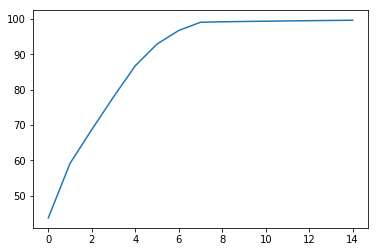

In [52]:
plt.plot(var1)

In [53]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

7

In [54]:
pca = PCA(n_components=d)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [55]:
X_train_pca.shape

(11256, 7)

In [56]:
X_test_pca.shape

(2815, 7)

## Visualize Train and Test Accuracy Scores

In [57]:
def grid_train_test_plot(df,col,train,test,title,xlabel,ylabel,width,height,flag):
    fig = plt.figure(figsize=(width,height))
    x=len(df[col])
    x_label=df[col].unique()
    ax = fig.add_subplot(111,facecolor='white')
    ax.plot(df[col], df[train], c = 'g', linewidth=2, alpha=0.7,label='Train Accuracy Score')
    ax.plot(df[col], df[test], c = 'b',linewidth=2, alpha=0.7,label='Test Accuracy Score')
    ax.scatter(df[col], df[train], c = 'g', alpha=0.7,label='Train Accuracy Score')
    ax.scatter(df[col], df[test], c = 'b',alpha=0.7,label='Test Accuracy Score')
    if(flag=='show'):
        for i,j in zip(df[col],round(df[train],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
        for i,j in zip(df[col],round(df[test],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
    ax.legend()
    plt.grid(zorder=0)
    ax.set_title(title,fontsize=20,weight='bold')
    ax.set_xlabel(xlabel,fontsize=10,weight='bold')
    ax.set_ylabel(ylabel,fontsize=10,weight='bold')
    handles, labels = ax.get_legend_handles_labels()
    plt.show()

## K Neighbors Classifier

In kNN classification algorithm, an object is classified by a majority vote of its neighbors based on the k closest training examples in the feature space.

In [58]:
knn_param_grid = {'n_neighbors': list(np.arange(1,11))}

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
knn_grid_search.fit(X_train_pca, y_train)
print("Best Parameters : {}".format(knn_grid_search.best_params_))
print("Best cross_val score : {}".format(knn_grid_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   18.2s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   18.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.7s finished


Best Parameters : {'n_neighbors': 10}
Best cross_val score : 0.9565855762714941


In [60]:
knnclassresults = pd.DataFrame(knn_grid_search.cv_results_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross-Validated Accuracy')

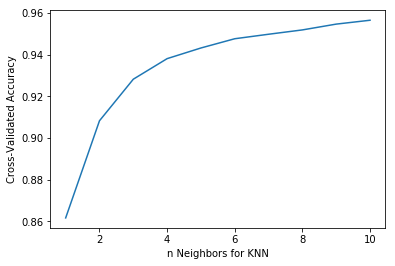

In [61]:
grid_mean_scores = [result.mean_validation_score for result in knn_grid_search.grid_scores_]
plt.plot(np.arange(1,11,1), grid_mean_scores)
plt.xlabel('n Neighbors for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [62]:
knn_accuracy_train = knn_grid_search.best_estimator_.score(X_train_pca, y_train)
knn_accuracy_test = knn_grid_search.best_estimator_.score(X_test_pca, y_test)

print('K Neighbors Classifier - Train Accuracy: %.2f'%knn_accuracy_train)
print('K Neighbors Classifier - Test Accuracy: %.2f '%knn_accuracy_test)

K Neighbors Classifier - Train Accuracy: 0.94
K Neighbors Classifier - Test Accuracy: 0.93 


In [63]:
knn_auc_train = roc_auc_score(y_train,knn_grid_search.predict(X_train_pca))
knn_auc_test = roc_auc_score(y_test,knn_grid_search.predict(X_test_pca))

print('K Neighbors Classifier - Train roc_auc_score: %.2f'%knn_auc_train)
print('K Neighbors Classifier - Test roc_auc_score: %.2f '%knn_auc_test)

K Neighbors Classifier - Train roc_auc_score: 0.88
K Neighbors Classifier - Test roc_auc_score: 0.87 


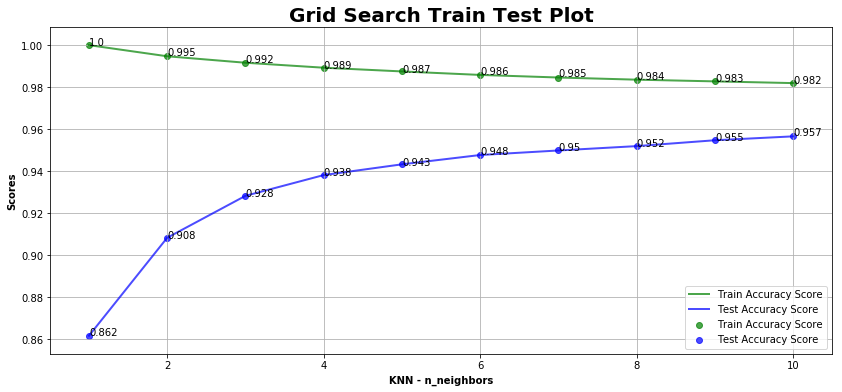

In [64]:
grid_train_test_plot(knnclassresults,'param_n_neighbors','mean_train_score','mean_test_score','Grid Search Train Test Plot','KNN - n_neighbors','Scores',14,6,'show')

In [65]:
report_table = [['K Neighbors Classifier', str(knn_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), knn_accuracy_train, knn_accuracy_test, knn_auc_train, knn_auc_test]]

 ## Logistic Regression Classifier

Logistic Regression works with binary data, if there is a Buzz (1) or not (0). Logistic model is based on the probability of an event occurring.

In [66]:
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1','l2']}

In [67]:
from sklearn.linear_model import LogisticRegression

lr_grid_search = GridSearchCV(LogisticRegression(random_state = 10), lr_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
lr_grid_search.fit(X_train_pca, y_train)
print("Best Parameters : {}".format(lr_grid_search.best_params_))
print("Best cross_val score : {}".format(lr_grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:   19.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   19.4s finished


Best Parameters : {'C': 100, 'penalty': 'l2'}
Best cross_val score : 0.8668619788997508


In [68]:
lrclassresults = pd.DataFrame(lr_grid_search.cv_results_)
lrclassresults['identifier_name'] = lrclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
lrclassresults['identifier'] = (lrclassresults.index)

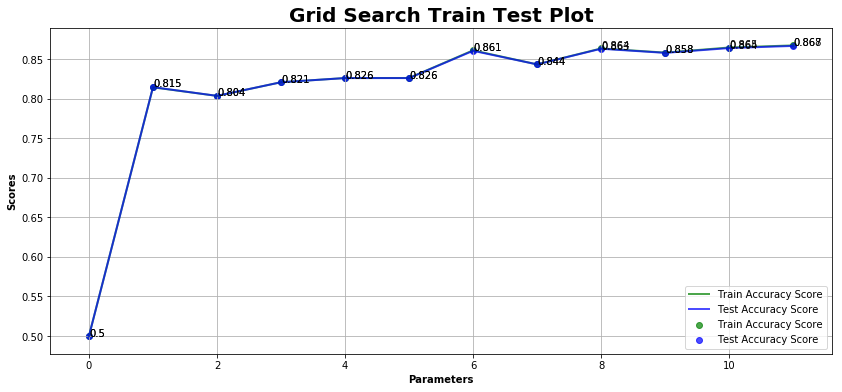

,0,1,2,3,4,5,6,7,8,9,10,11
identifier,0,1,2,3,4,5,6,7,8,9,10,11
identifier_name,"'C': 0.001, 'penalty': 'l1'","'C': 0.001, 'penalty': 'l2'","'C': 0.01, 'penalty': 'l1'","'C': 0.01, 'penalty': 'l2'","'C': 0.1, 'penalty': 'l1'","'C': 0.1, 'penalty': 'l2'","'C': 1, 'penalty': 'l1'","'C': 1, 'penalty': 'l2'","'C': 10, 'penalty': 'l1'","'C': 10, 'penalty': 'l2'","'C': 100, 'penalty': 'l1'","'C': 100, 'penalty': 'l2'"


In [69]:
grid_train_test_plot(lrclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'show')
lrclassresults[['identifier','identifier_name']].transpose()

In [70]:
lr_accuracy_train = lr_grid_search.best_estimator_.score(X_train_pca, y_train)
lr_accuracy_test = lr_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Logistic Regression - Train Accuracy: %.2f'%lr_accuracy_train)
print('Logistic Regression - Test Accuracy: %.2f '%lr_accuracy_test)

Logistic Regression - Train Accuracy: 0.86
Logistic Regression - Test Accuracy: 0.85 


In [71]:
lr_auc_train = roc_auc_score(y_train,lr_grid_search.predict(X_train_pca))
lr_auc_test = roc_auc_score(y_test,lr_grid_search.predict(X_test_pca))

print('Logistic Regression - Train roc_auc_score: %.2f'%lr_auc_train)
print('Logistic Regression - Test roc_auc_score: %.2f '%lr_auc_test)

Logistic Regression - Train roc_auc_score: 0.64
Logistic Regression - Test roc_auc_score: 0.63 


In [72]:
report_table = report_table + [['Logistic Regression', str(lr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), lr_accuracy_train, lr_accuracy_test, lr_auc_train, lr_auc_test]]

## Linear Support Vector Machine Classifier

The objective of a Linear SVC is fit a "best fit" hyperplane that divides, or categorizes, the data.

In [73]:
linsvc_param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l2'],'loss':['hinge','squared_hinge']},
                     {'C':[0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1'],'dual':[False],'loss':['squared_hinge']}]

In [74]:
from sklearn.svm import LinearSVC
linsvc_grid_search = GridSearchCV(LinearSVC(random_state = 10),linsvc_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
linsvc_grid_search.fit(X_train_pca, y_train)
print("Best Parameters : {}".format(linsvc_grid_search.best_params_))
print("Best cross_val score : {}".format(linsvc_grid_search.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:   25.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   26.1s finished


Best Parameters : {'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best cross_val score : 0.863662696783187


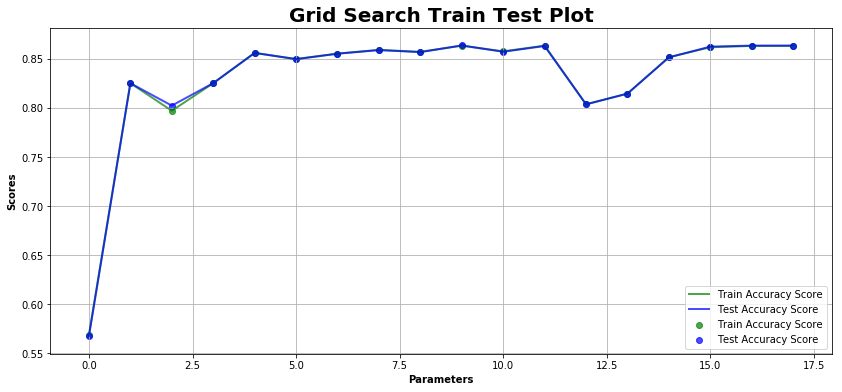

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
identifier,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
identifier_name,"'C': 0.001, 'loss': 'hinge', 'penalty': 'l2'","'C': 0.001, 'loss': 'squared_hinge', 'penalty'...","'C': 0.01, 'loss': 'hinge', 'penalty': 'l2'","'C': 0.01, 'loss': 'squared_hinge', 'penalty':...","'C': 0.1, 'loss': 'hinge', 'penalty': 'l2'","'C': 0.1, 'loss': 'squared_hinge', 'penalty': ...","'C': 1, 'loss': 'hinge', 'penalty': 'l2'","'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'","'C': 10, 'loss': 'hinge', 'penalty': 'l2'","'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'","'C': 100, 'loss': 'hinge', 'penalty': 'l2'","'C': 100, 'loss': 'squared_hinge', 'penalty': ...","'C': 0.001, 'dual': False, 'loss': 'squared_hi...","'C': 0.01, 'dual': False, 'loss': 'squared_hin...","'C': 0.1, 'dual': False, 'loss': 'squared_hing...","'C': 1, 'dual': False, 'loss': 'squared_hinge'...","'C': 10, 'dual': False, 'loss': 'squared_hinge...","'C': 100, 'dual': False, 'loss': 'squared_hing..."


In [75]:
linsvcclassresults = pd.DataFrame(linsvc_grid_search.cv_results_)
linsvcclassresults['identifier_name'] = linsvcclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
linsvcclassresults['identifier'] = (linsvcclassresults.index)
grid_train_test_plot(linsvcclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')
linsvcclassresults[['identifier','identifier_name']].transpose()

In [76]:
lsvc_accuracy_train = linsvc_grid_search.best_estimator_.score(X_train_pca, y_train)
lsvc_accuracy_test = linsvc_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Linear Support Vector Machine Classifier - Train Accuracy: %.2f'%lsvc_accuracy_train)
print('Linear Support Vector Machine Classifier - Test Accuracy: %.2f '%lsvc_accuracy_test)

Linear Support Vector Machine Classifier - Train Accuracy: 0.83
Linear Support Vector Machine Classifier - Test Accuracy: 0.82 


In [77]:
lsvc_auc_train = roc_auc_score(y_train,linsvc_grid_search.predict(X_train_pca))
lsvc_auc_test = roc_auc_score(y_test,linsvc_grid_search.predict(X_test_pca))

print('Linear Support Vector Machine Classifier - Train roc_auc_score: %.2f'%lsvc_auc_train)
print('Linear Support Vector Machine Classifier - Test roc_auc_score: %.2f '%lsvc_auc_test)

Linear Support Vector Machine Classifier - Train roc_auc_score: 0.57
Linear Support Vector Machine Classifier - Test roc_auc_score: 0.55 


In [78]:
report_table = report_table + [['Linear Support Vector Machine Classifier', str(linsvc_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), lsvc_accuracy_train, lsvc_accuracy_test, lsvc_auc_train, lsvc_auc_test]]

## Linear Kernelized Support Vector Machine Classifier

In [79]:
svm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [80]:
from sklearn.svm import SVC

svm_grid_search = GridSearchCV(SVC(kernel = 'linear', random_state = 10),svm_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
svm_grid_search.fit(X_train_pca, y_train)
print("Best Parameters : {}".format(svm_grid_search.best_params_))
print("Best cross_val score : {}".format(svm_grid_search.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   23.1s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   23.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   26.0s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.1s finished


Best Parameters : {'C': 100}
Best cross_val score : 0.8590980427477717


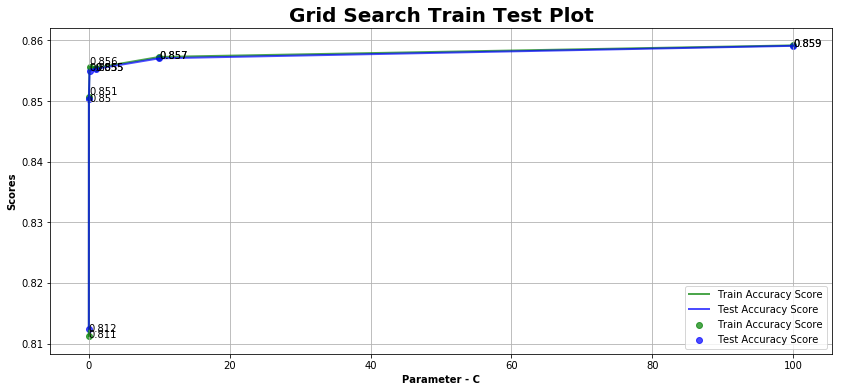

In [81]:
linsvmclassresults = pd.DataFrame(svm_grid_search.cv_results_)
grid_train_test_plot(linsvmclassresults,'param_C','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameter - C','Scores',14,6,'show')

In [82]:
svm_accuracy_train = svm_grid_search.best_estimator_.score(X_train_pca, y_train)
svm_accuracy_test = svm_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Linear Kernelized Support Vector Machine Classifier - Train Accuracy: %.2f'%svm_accuracy_train)
print('Linear Kernelized Support Vector Machine Classifier - Test Accuracy: %.2f '%svm_accuracy_test)

Linear Kernelized Support Vector Machine Classifier - Train Accuracy: 0.88
Linear Kernelized Support Vector Machine Classifier - Test Accuracy: 0.87 


In [83]:
svm_auc_train = roc_auc_score(y_train,svm_grid_search.predict(X_train_pca))
svm_auc_test = roc_auc_score(y_test,svm_grid_search.predict(X_test_pca))

print('Linear Kernelized Support Vector Machine Classifier - Train roc_auc_score: %.2f'%svm_auc_train)
print('Linear Kernelized Support Vector Machine Classifier - Test roc_auc_score: %.2f '%svm_auc_test)

Linear Kernelized Support Vector Machine Classifier - Train roc_auc_score: 0.70
Linear Kernelized Support Vector Machine Classifier - Test roc_auc_score: 0.67 


In [84]:
report_table = report_table + [['Linear Kernelized Support Vector Machine Classifier', str(svm_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), svm_accuracy_train, svm_accuracy_test, svm_auc_train, svm_auc_test]]

## RBF Kernelized Support Vector Machine Classifier

In [85]:
rbfsvm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

In [86]:
rbfsvm_grid_search = GridSearchCV(SVC(kernel = 'rbf', random_state = 10),rbfsvm_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
rbfsvm_grid_search.fit(X_train_pca, y_train)
print("Best Parameters : {}".format(rbfsvm_grid_search.best_params_))
print("Best cross_val score : {}".format(rbfsvm_grid_search.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.6min finished


Best Parameters : {'C': 100, 'gamma': 100}
Best cross_val score : 0.9242406834474964


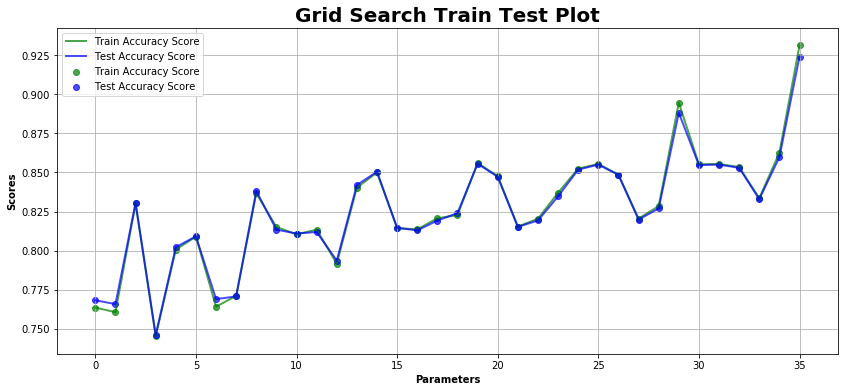

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
identifier,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
identifier_name,"'C': 0.001, 'gamma': 0.001","'C': 0.001, 'gamma': 0.01","'C': 0.001, 'gamma': 0.1","'C': 0.001, 'gamma': 1","'C': 0.001, 'gamma': 10","'C': 0.001, 'gamma': 100","'C': 0.01, 'gamma': 0.001","'C': 0.01, 'gamma': 0.01","'C': 0.01, 'gamma': 0.1","'C': 0.01, 'gamma': 1",...,"'C': 10, 'gamma': 0.1","'C': 10, 'gamma': 1","'C': 10, 'gamma': 10","'C': 10, 'gamma': 100","'C': 100, 'gamma': 0.001","'C': 100, 'gamma': 0.01","'C': 100, 'gamma': 0.1","'C': 100, 'gamma': 1","'C': 100, 'gamma': 10","'C': 100, 'gamma': 100"


In [87]:
rbfsvmclassresults = pd.DataFrame(rbfsvm_grid_search.cv_results_)
rbfsvmclassresults['identifier_name'] = rbfsvmclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
rbfsvmclassresults['identifier'] = (rbfsvmclassresults.index)
grid_train_test_plot(rbfsvmclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')
rbfsvmclassresults[['identifier','identifier_name']].transpose()

In [88]:
rbfsvm_accuracy_train = rbfsvm_grid_search.best_estimator_.score(X_train_pca, y_train)
rbfsvm_accuracy_test = rbfsvm_grid_search.best_estimator_.score(X_test_pca, y_test)

print('RBF Kernelized Support Vector Machine Classifier - Train Accuracy: %.2f'%rbfsvm_accuracy_train)
print('RBF Kernelized Support Vector Machine Classifier - Test Accuracy: %.2f '%rbfsvm_accuracy_test)

RBF Kernelized Support Vector Machine Classifier - Train Accuracy: 0.92
RBF Kernelized Support Vector Machine Classifier - Test Accuracy: 0.91 


In [89]:
rbfsvm_auc_train = roc_auc_score(y_train,rbfsvm_grid_search.predict(X_train_pca))
rbfsvm_auc_test = roc_auc_score(y_test,rbfsvm_grid_search.predict(X_test_pca))

print('RBF Kernelized Support Vector Machine Classifier - Train roc_auc_score: %.2f'%rbfsvm_auc_train)
print('RBF Kernelized Support Vector Machine Classifier - Test roc_auc_score: %.2f '%rbfsvm_auc_test)

RBF Kernelized Support Vector Machine Classifier - Train roc_auc_score: 0.82
RBF Kernelized Support Vector Machine Classifier - Test roc_auc_score: 0.81 


In [90]:
report_table = report_table + [['RBF Kernelized Support Vector Machine Classifier', str(rbfsvm_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), rbfsvm_accuracy_train, rbfsvm_accuracy_test, rbfsvm_auc_train, rbfsvm_auc_test]]

## Poly Kernelized Support Vector Machine Classifier

In [91]:
psvm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01], 'degree' : [2, 3]}

In [92]:
psvm_grid_search = GridSearchCV(SVC(kernel = 'poly', random_state = 10),psvm_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
psvm_grid_search.fit(X_train_pca, y_train)
print("Best Parameters : {}".format(psvm_grid_search.best_params_))
print("Best cross_val score : {}".format(psvm_grid_search.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   52.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   53.2s finished


Best Parameters : {'C': 1, 'degree': 2, 'gamma': 0.01}
Best cross_val score : 0.8336142441969997


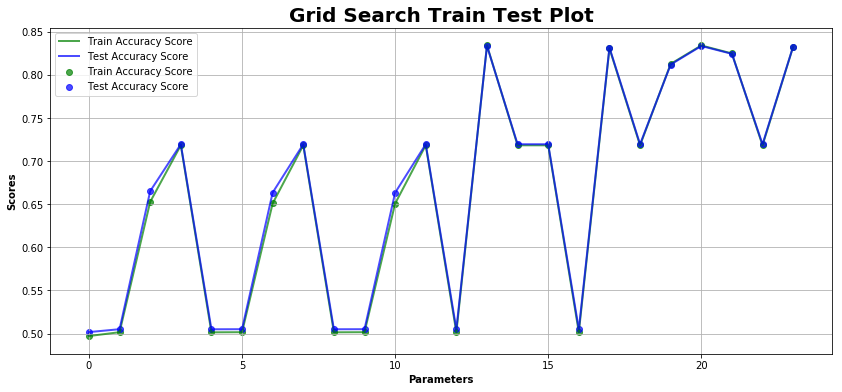

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
identifier,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
identifier_name,"'C': 0.001, 'degree': 2, 'gamma': 0.001","'C': 0.001, 'degree': 2, 'gamma': 0.01","'C': 0.001, 'degree': 3, 'gamma': 0.001","'C': 0.001, 'degree': 3, 'gamma': 0.01","'C': 0.01, 'degree': 2, 'gamma': 0.001","'C': 0.01, 'degree': 2, 'gamma': 0.01","'C': 0.01, 'degree': 3, 'gamma': 0.001","'C': 0.01, 'degree': 3, 'gamma': 0.01","'C': 0.1, 'degree': 2, 'gamma': 0.001","'C': 0.1, 'degree': 2, 'gamma': 0.01",...,"'C': 1, 'degree': 3, 'gamma': 0.001","'C': 1, 'degree': 3, 'gamma': 0.01","'C': 10, 'degree': 2, 'gamma': 0.001","'C': 10, 'degree': 2, 'gamma': 0.01","'C': 10, 'degree': 3, 'gamma': 0.001","'C': 10, 'degree': 3, 'gamma': 0.01","'C': 100, 'degree': 2, 'gamma': 0.001","'C': 100, 'degree': 2, 'gamma': 0.01","'C': 100, 'degree': 3, 'gamma': 0.001","'C': 100, 'degree': 3, 'gamma': 0.01"


In [93]:
polysvmclassresults = pd.DataFrame(psvm_grid_search.cv_results_)
polysvmclassresults['identifier_name'] = polysvmclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
polysvmclassresults['identifier'] = (polysvmclassresults.index)
grid_train_test_plot(polysvmclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')
polysvmclassresults[['identifier','identifier_name']].transpose()

In [94]:
psvm_accuracy_train = psvm_grid_search.best_estimator_.score(X_train_pca, y_train)
psvm_accuracy_test = psvm_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Poly Kernelized Support Vector Machine Classifier - Train Accuracy: %.2f'%psvm_accuracy_train)
print('Poly Kernelized Support Vector Machine Classifier - Test Accuracy: %.2f '%psvm_accuracy_test)

Poly Kernelized Support Vector Machine Classifier - Train Accuracy: 0.81
Poly Kernelized Support Vector Machine Classifier - Test Accuracy: 0.80 


In [95]:
psvm_auc_train = roc_auc_score(y_train,psvm_grid_search.predict(X_train_pca))
psvm_auc_test = roc_auc_score(y_test,psvm_grid_search.predict(X_test_pca))

print('Poly Kernelized Support Vector Machine Classifier - Train roc_auc_score: %.2f'%psvm_auc_train)
print('Poly Kernelized Support Vector Machine Classifier - Test roc_auc_score: %.2f '%psvm_auc_test)

Poly Kernelized Support Vector Machine Classifier - Train roc_auc_score: 0.50
Poly Kernelized Support Vector Machine Classifier - Test roc_auc_score: 0.50 


In [96]:
report_table = report_table + [['Poly Kernelized Support Vector Machine Classifier',str(psvm_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), psvm_accuracy_train, psvm_accuracy_test, psvm_auc_train, psvm_auc_test]]

## Decision Tree Classifier

Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time it receive an answer, a follow-up question is asked until a conclusion about the class label of the record is reached.

In [97]:
from sklearn.model_selection import GridSearchCV
dt_param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10],'max_features':[1,2,3,4,5]}

In [98]:
from sklearn.tree import DecisionTreeClassifier

dt_grid_search= GridSearchCV( DecisionTreeClassifier(random_state = 10),dt_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
dt_grid_search.fit(X_train_pca, y_train)
print("Best Parameters : {}".format(dt_grid_search.best_params_))
print("Best cross_val score : {}".format(dt_grid_search.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1934s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:   18.3s


Best Parameters : {'max_depth': 6, 'max_features': 5}
Best cross_val score : 0.9502456776786896


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   19.0s finished


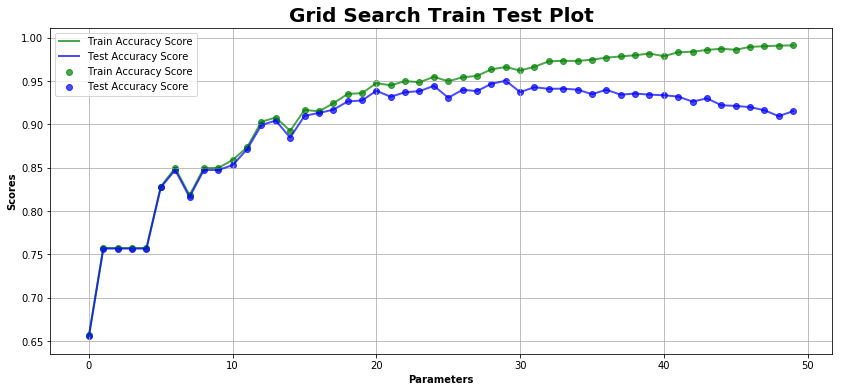

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
identifier,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
identifier_name,"'max_depth': 1, 'max_features': 1","'max_depth': 1, 'max_features': 2","'max_depth': 1, 'max_features': 3","'max_depth': 1, 'max_features': 4","'max_depth': 1, 'max_features': 5","'max_depth': 2, 'max_features': 1","'max_depth': 2, 'max_features': 2","'max_depth': 2, 'max_features': 3","'max_depth': 2, 'max_features': 4","'max_depth': 2, 'max_features': 5",...,"'max_depth': 9, 'max_features': 1","'max_depth': 9, 'max_features': 2","'max_depth': 9, 'max_features': 3","'max_depth': 9, 'max_features': 4","'max_depth': 9, 'max_features': 5","'max_depth': 10, 'max_features': 1","'max_depth': 10, 'max_features': 2","'max_depth': 10, 'max_features': 3","'max_depth': 10, 'max_features': 4","'max_depth': 10, 'max_features': 5"


In [99]:
dtclassresults = pd.DataFrame(dt_grid_search.cv_results_)
dtclassresults['identifier_name'] = dtclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
dtclassresults['identifier'] = (dtclassresults.index)
grid_train_test_plot(dtclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')
dtclassresults[['identifier','identifier_name']].transpose()

In [100]:
dt_accuracy_train = dt_grid_search.best_estimator_.score(X_train_pca, y_train)
dt_accuracy_test = dt_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Decision Tree Classifier - Train Accuracy: %.2f'%dt_accuracy_train)
print('Decision Tree Classifier - Test Accuracy: %.2f '%dt_accuracy_test)

Decision Tree Classifier - Train Accuracy: 0.92
Decision Tree Classifier - Test Accuracy: 0.90 


In [101]:
dt_auc_train = roc_auc_score(y_train,dt_grid_search.predict(X_train_pca))
dt_auc_test = roc_auc_score(y_test,dt_grid_search.predict(X_test_pca))

print('Decision Tree Classifier - Train roc_auc_score: %.2f'%dt_auc_train)
print('Decision Tree Classifier - Test roc_auc_score: %.2f '%dt_auc_test)

Decision Tree Classifier - Train roc_auc_score: 0.83
Decision Tree Classifier - Test roc_auc_score: 0.79 


In [102]:
report_table = report_table + [['Decision Tree Classifier', str(dt_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), dt_accuracy_train, dt_accuracy_test, dt_auc_train, dt_auc_test]]

In [103]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameters', 'Train Accuracy', 'Test Accuracy', 'Train AUC Score', 'Test AUC Score'])

In [104]:
report.index = report['Model Name']
report.drop(['Model Name'],axis=1,inplace=True)

In [105]:
report

,Model Parameters,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score
Model Name,,,,,
K Neighbors Classifier,n_neighbors: 10,0.939144,0.931794,0.880049,0.865594
Logistic Regression,"C: 100, penalty: l2",0.862651,0.853641,0.644656,0.626134
Linear Support Vector Machine Classifier,"C: 10, loss: squared_hinge, penalty: l2",0.833333,0.824867,0.567742,0.552632
Linear Kernelized Support Vector Machine Classifier,C: 100,0.882018,0.870693,0.695412,0.669691
RBF Kernelized Support Vector Machine Classifier,"C: 100, gamma: 100",0.921731,0.914387,0.822435,0.806024
Poly Kernelized Support Vector Machine Classifier,"C: 1, degree: 2, gamma: 0.01",0.807214,0.804263,0.500000,0.500000
Decision Tree Classifier,"max_depth: 6, max_features: 5",0.920487,0.903375,0.826751,0.794372


Train and test scores of KNN Classifier, RBF Kernelized Support Vector Classifier and Decision Tree Classifier are on the higher end i.e. between 0.82 to 0.88.  For all the other models, the train and test scores post PCA have drastically fallen down.

KNearestNeighbors Classifier with train and test score of 0.88 and 0.86 respectively, are considered as the best model for the PCA applied dataset.

In [106]:
report['identifier'] = report.index
report['identifier'] = report.identifier.apply(lambda x: str(x).replace('Classifier','').replace('Support Vector Machine','SVM'))

In [107]:
old_table.index=old_table['Model Name']
old_table.drop(['Model Name'],axis=1,inplace=True)

In [108]:
old_table['identifier'] = old_table.index
old_table['identifier'] = old_table.identifier.apply(lambda x: str(x).replace('Classifier','').replace('Support Vector Machine','SVM'))

In [109]:
old_table

,Model Parameters,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score,identifier
Model Name,,,,,,
K Neighbors Classifier,n_neighbors: 10,0.970149,0.961989,0.939768,0.924188,K Neighbors
Logistic Regression,"C: 10 , penalty: l1",0.969172,0.966607,0.941443,0.936672,Logistic Regression
Linear Support Vector Machine Classifier,"C: 1, dual: False, loss: squared_hinge, penalt...",0.967395,0.966607,0.934555,0.933925,Linear SVM
Linear Kernelized Support Vector Machine Classifier,C: 100,0.969083,0.966963,0.942966,0.938952,Linear Kernelized SVM
RBF Kernelized Support Vector Machine Classifier,"C: 0.1, gamma: 0.01",0.809879,0.807460,0.506912,0.508167,RBF Kernelized SVM
Poly Kernelized Support Vector Machine Classifier,"C: 10, degree: 2, gamma: 0.01",0.884684,0.879218,0.702149,0.691470,Poly Kernelized SVM
Decision Tree Classifier,"max_depth: 5, max_features: 7",0.970593,0.960924,0.948813,0.931078,Decision Tree


### PCA Vs Non PCA Fitted Hypertuned Models Plot - Training Data

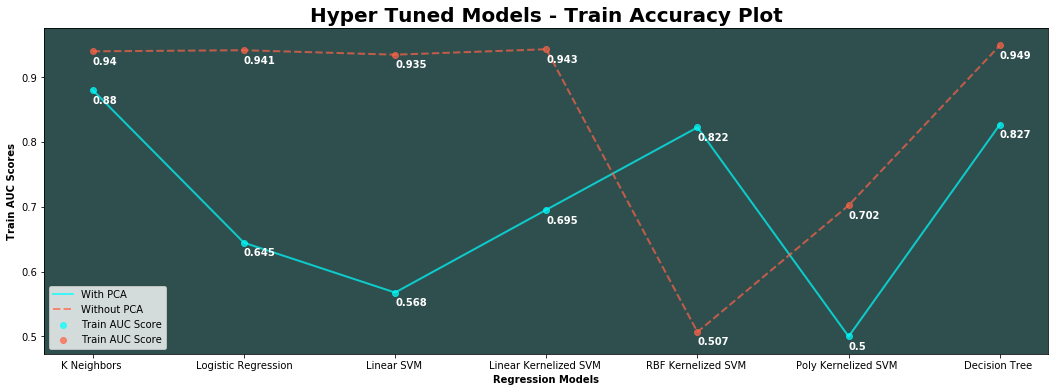

In [110]:
%matplotlib inline
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111,facecolor='darkslategray')
opacity=0.7
ax.plot(report['identifier'], report['Train AUC Score'], c = 'cyan',linewidth=2,alpha=opacity,label='With PCA')
#ax.plot(report['identifier'], report['Test AUC Score'], c = 'green',linewidth=2,alpha=opacity)
ax.scatter(report['identifier'], report['Train AUC Score'], c = 'cyan',alpha=opacity)
#ax.scatter(report['identifier'], report['Test AUC Score'], c = 'green',alpha=opacity)
ax.plot(old_table['identifier'], old_table['Train AUC Score'], '--',c = 'tomato',linewidth=2,alpha=opacity,label='Without PCA')
#ax.plot(old_table['identifier'], old_table['Test AUC Score'], c = 'lightgreen',linewidth=2,alpha=opacity)
ax.scatter(old_table['identifier'], old_table['Train AUC Score'], c = 'tomato',alpha=opacity)
for i,j in zip(report['identifier'],round(report['Train AUC Score'],3)):
    ax.annotate(str(j),xy=(i,j-0.02),color='white',weight='bold')
for i,j in zip(old_table['identifier'],round(old_table['Train AUC Score'],3)):
    ax.annotate(str(j),xy=(i,j-0.02),color='white',weight='bold')
ax.legend()
ax.set_title('Hyper Tuned Models - Train Accuracy Plot',fontsize=20,weight='bold')
ax.set_xlabel('Regression Models',fontsize=10,weight='bold')
ax.set_ylabel('Train AUC Scores',fontsize=10,weight='bold')
handles, labels = ax.get_legend_handles_labels()
plt.show()

### PCA Vs Non PCA Fitted Hypertuned Models Plot - Testing Data

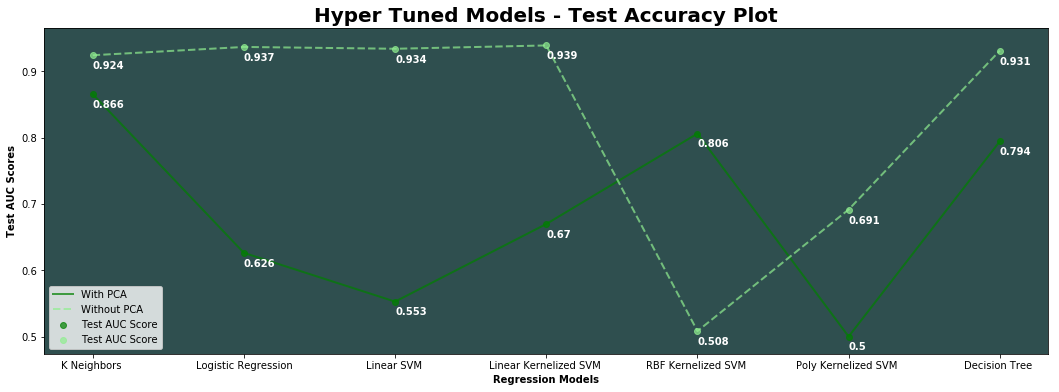

In [111]:
%matplotlib inline
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111,facecolor='darkslategray')
opacity=0.7
#ax.plot(report['identifier'], report['Train AUC Score'], '--',c = 'cyan',linewidth=2,alpha=opacity,label='With PCA')
ax.plot(report['identifier'], report['Test AUC Score'], c = 'green',linewidth=2,alpha=opacity,label='With PCA')
#ax.scatter(report['identifier'], report['Train AUC Score'], c = 'cyan',alpha=opacity)
ax.scatter(report['identifier'], report['Test AUC Score'], c = 'green',alpha=opacity)
#ax.plot(old_table['identifier'], old_table['Train AUC Score'], '--',c = 'tomato',linewidth=2,alpha=opacity,label='Without PCA')
ax.plot(old_table['identifier'], old_table['Test AUC Score'],'--', c = 'lightgreen',linewidth=2,alpha=opacity,label='Without PCA')
ax.scatter(old_table['identifier'], old_table['Test AUC Score'], c = 'lightgreen',alpha=opacity)
for i,j in zip(report['identifier'],round(report['Test AUC Score'],3)):
    ax.annotate(str(j),xy=(i,j-0.02),color='white',weight='bold')
for i,j in zip(old_table['identifier'],round(old_table['Test AUC Score'],3)):
    ax.annotate(str(j),xy=(i,j-0.02),color='white',weight='bold')
ax.legend()
ax.set_title('Hyper Tuned Models - Test Accuracy Plot',fontsize=20,weight='bold')
ax.set_xlabel('Regression Models',fontsize=10,weight='bold')
ax.set_ylabel('Test AUC Scores',fontsize=10,weight='bold')
handles, labels = ax.get_legend_handles_labels()
plt.show()

## Comparison Study

#### Looking at the plots of Train and Test scores for all the models, we found the following
- The accuracy for Logistic, LinearSVM, SVC(Linear,RBF and Poly) are poorer for PCA applied dataset than the raw dataset.
- KNearestNeighbors and Decision Tree have better accuracies when compared to all other models in general.
- On the whole, applying PCA on this dataset has not helped in improving the model accuracies.

Though PCA has reduced number of dimensions but the accuracy scores of most of the models like Logistic, Linear SVM, Kernel SVM have been significantly affected. Except KNN and Decision Tree, they haven't taken a significant toll on their accuracy scores. Also, by applying PCA to our dataset, we loose ability to interpret the data.

## Deep Learning Model

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

In [113]:
# create model
dl_model = Sequential()
dl_model.add(Dense(12, input_dim=d, activation='relu'))
dl_model.add(Dense(8, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

In [114]:
# Compile model
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
# Fit the model
dl_model.fit(X_train_pca, y_train, epochs=150, batch_size=10)

Epoch 1/150
11256/11256 [==============================] - 1s 115us/step - loss: 0.4576 - acc: 0.8059
Epoch 2/150
11256/11256 [==============================] - 1s 88us/step - loss: 0.4352 - acc: 0.8072
Epoch 3/150
11256/11256 [==============================] - 1s 87us/step - loss: 0.4301 - acc: 0.8073
Epoch 4/150
11256/11256 [==============================] - 1s 88us/step - loss: 0.4223 - acc: 0.8090
Epoch 5/150
11256/11256 [==============================] - 1s 88us/step - loss: 0.4126 - acc: 0.8124
Epoch 6/150
11256/11256 [==============================] - 1s 100us/step - loss: 0.4030 - acc: 0.8153
Epoch 7/150
11256/11256 [==============================] - 1s 113us/step - loss: 0.3931 - acc: 0.8198
Epoch 8/150
11256/11256 [==============================] - 1s 106us/step - loss: 0.3843 - acc: 0.8275
Epoch 9/150
11256/11256 [==============================] - 1s 87us/step - loss: 0.3751 - acc: 0.8348
Epoch 10/150
11256/11256 [==============================] - 1s 87us/step - loss: 0.3679

In [116]:
# evaluate the model
score, acc = dl_model.evaluate(X_test_pca, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

2815/2815 [==============================] - 0s 63us/step
Test score: 0.25094999368327336
Test accuracy: 0.9097690862830113


In [117]:
y_predict = dl_model.predict(X_test_pca)
y_predict

array([[3.8684812e-01],
       [1.0511646e-04],
       [3.8554136e-02],
       ...,
       [2.3896094e-01],
       [1.5639007e-01],
       [6.8389726e-01]], dtype=float32)

In [118]:
dl_model.evaluate(X_test_pca, y_test)

2815/2815 [==============================] - 0s 14us/step


[0.2509499898918145, 0.9097690941808914]

In [119]:
dl_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


################################################THE END############################################################